<a href="https://colab.research.google.com/github/viniciusmaurente/Artificial-intelligence-classification-plants-Python/blob/master/sistema_visaoHandson_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Computer vision for inspection of metal parts (carbon steel)**

*** Código criado por Vinicius Vasconcelos Maurente, como estudo para o projeto de Mestrado em Engenharia da Computação na FURG - Universidade Federal do Rio Grande do Sul.***

This python algorithm is used with OpenCV, numpy and MatPlotLib libraries that are already installed by default in Google Colab. Only some opencv functions work by default in colab, in many cases it is necessary to run the vision system locally.

Here are presented some image processing techniques using the OpenCV library resources. In this case it's photos(dataset) you can add the image you want to check and you. Just include the path in the cv2.imread function.

It is worth mentioning that, to execute the if necessary in real time (video install and compile the libraries locally. Which can generate a certain headache with some possible compatibility errors, with operating systems. #here in Colab everything is left, just perform more simplified things.


Documentation OpenCV
https://docs.opencv.org/4.5.3/index.html


**Baixe os recursos (imagens): **
https://drive.google.com/drive/folders/1hykSqzu8IE6KCpgPFQWhYA5PWzRQPkUr?usp=sharing

E **faça upload** no seu Google **Drive**
---




In [ ]:
# importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Mounting connection with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading (reading) image. paste path path(entre ' ')
#image = cv2.imread('/content/drive/MyDrive/visao computacional opencv/corrosa-dif-text.jpg')
#image = cv2.imread('/content/drive/MyDrive/dataset-corrosao/imagens-treino/13_01_02_png.rf.ef855a3957cf6244625d2e5a3464c734.jpg')     
image = cv2.imread('/content/drive/MyDrive/dataset-corrosao/imagens-treino/13_04_01_png.rf.48b22d47b5884891a23ce61b71e6627d.jpg')     

In [ ]:
# Checks image size and channels
image.shape

(416, 416, 3)

In [ ]:
450 * 300 * 3

405000

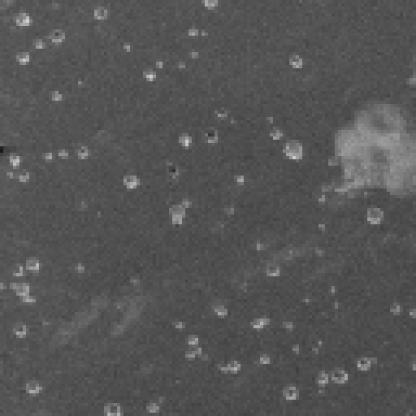

In [ ]:
# Import cv2_imshow function and show the image

from google.colab.patches import cv2_imshow
cv2_imshow(image) 

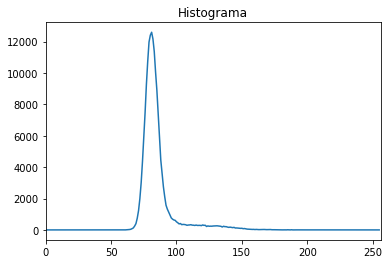

In [ ]:
image_histogram = cv2.calcHist([image], [0], None, [256], [0,256])

plt.figure()
plt.title('Histograma')
plt.xlabel('')
plt.ylabel('')
plt.plot(image_histogram)
plt.xlim([0,256])
plt.show()

In [ ]:
# The cv2.resize function, resizes the image in Pixels measurement unit

image = cv2.resize(image,(500,500))
image.shape

(500, 500, 3)

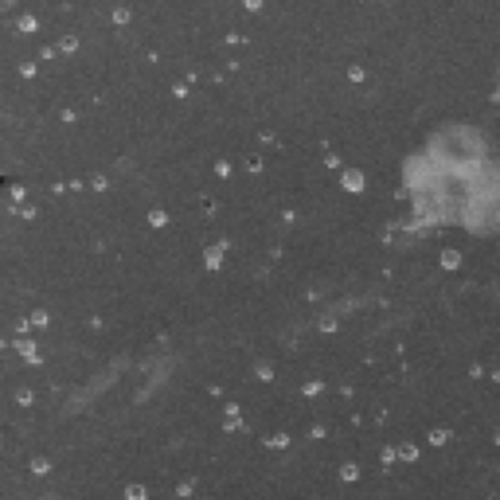

In [ ]:
# Image smoothing using OpenCV Gaussian Blur As with any other signal, images can also contain different types of noise,
# Probably the most useful filter (although not the fastest).
# Gaussian filtering is done by convolving each point in the input matrix with a Gaussian kernel and then summing them all together to produce the output matrix.

blurred_frame = cv2.GaussianBlur(image, (5,5), 0)
cv2_imshow(blurred_frame)


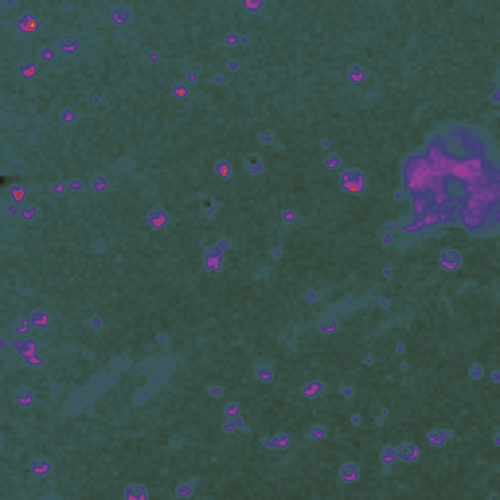

In [ ]:
#cv2.COLOR_HSV2BGR - HSV is the abbreviation for the color system formed by the components hue (hue), saturation (saturation) and value (value).
# For image segmentation, the HSV space is the most used because the colors are represented only in the H channel, the other two are related to the tonality.
hsv_frame = cv2.cvtColor(blurred_frame, cv2.COLOR_HSV2BGR)
cv2_imshow(hsv_frame)

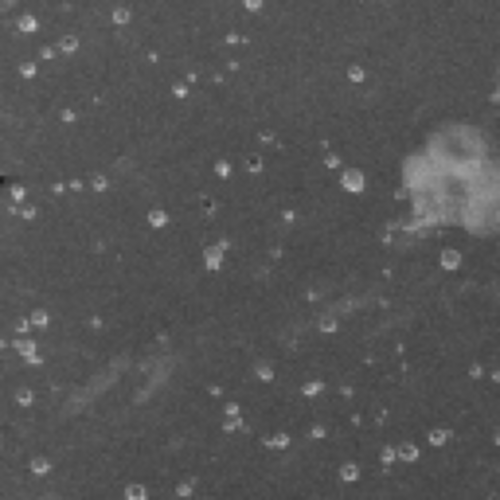

In [ ]:
# the cv2.COLOR_BGR2GRAY function converts the image to grayscale
image_cinza = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_cinza)


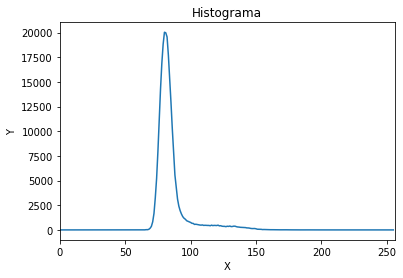

In [ ]:
gray_histogram = cv2.calcHist([image_cinza], [0], None, [256], [0,256])

plt.figure()
plt.title('Histograma')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(gray_histogram)
plt.xlim([0,256])
plt.show()

In [ ]:
image_cinza.shape

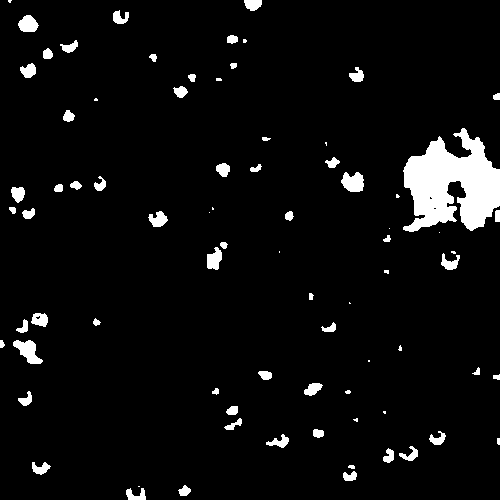

In [ ]:
# Threshold, is a technique in OpenCV, which is the assignment of pixel values ​​relative to the given threshold value. At threshold, each pixel value is compared to the threshold value.
# If the pixel value is less than the threshold, it is set to 0, otherwise it is set to a maximum value (usually 255).

(thresh, image_seg) = cv2.threshold(image_cinza, 125, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh = 113
image_seg = cv2.threshold(image_cinza, thresh, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(image_seg)

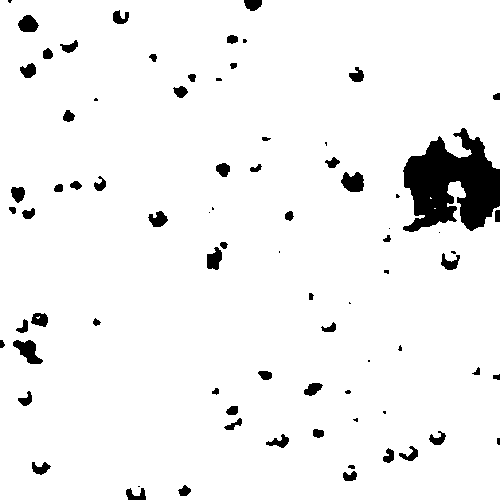

In [ ]:
# inverts the binary image generated by the threshold

mask_inv = cv2.bitwise_not(image_seg)
cv2_imshow(mask_inv)

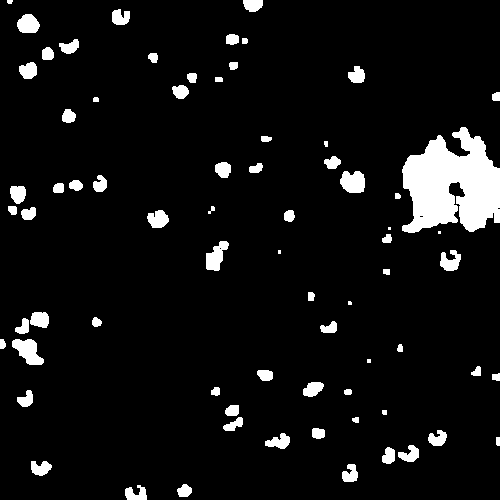

In [ ]:
# Morphological transformations are some simple operations based on the shape of the image. Typically runs on binary images.
# Two basic morphological operators are erosion and dilation.

# It is the exact opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'.
# Therefore, the white region in the image increases or the size of the foreground object increases. Typically, in cases such as noise removal, erosion is followed by dilation.
for i in range(0,1):
	image_dilated = cv2.dilate(image_seg, None, iterations=i + 1)
	cv2_imshow(image_dilated)


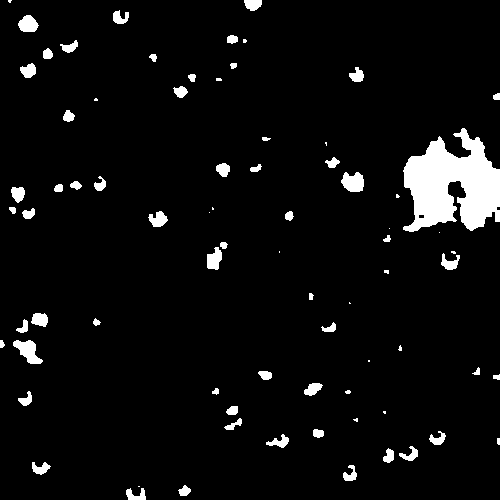

In [ ]:
# Erosão - A ideia básica de erosão é apenas como a erosão do solo, ela desgasta os limites do objeto em primeiro plano (sempre tente manter o primeiro plano em branco). 
for i in range(0, 1):
	image_eroded = cv2.erode(image_dilated, None, iterations=i + 1)
	cv2_imshow(image_eroded)


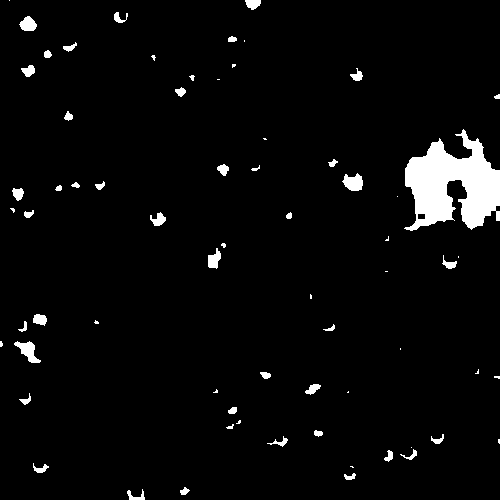

In [ ]:
for i in range(0, 1):
	image_eroded2 = cv2.erode(image_eroded, None, iterations=i + 1)
	cv2_imshow(image_eroded2)


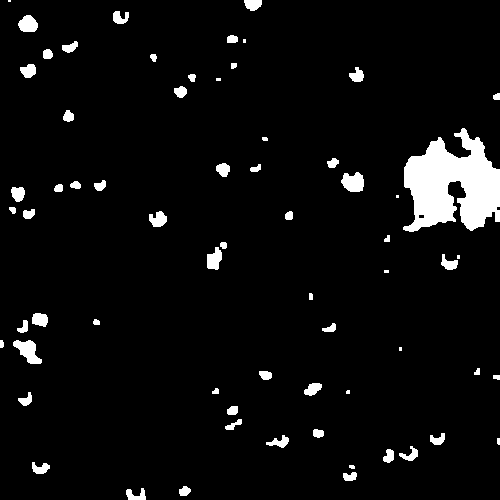

In [ ]:
# Gera a imagem morphologica após a segmentação e transformações morphológicas
for i in range(0,1):
	image_morpho = cv2.dilate(image_eroded2, None, iterations=i + 1)
cv2_imshow(image_morpho)


Area do defeito encontrado (pixels):   2.0
Numero de defeitos encontrados ->  67


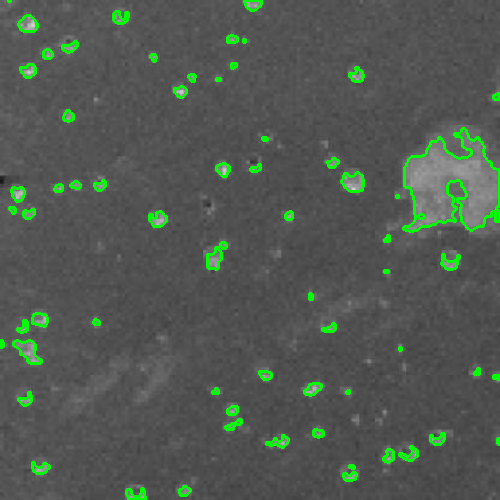

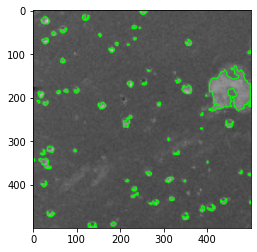

In [ ]:
# What are contours?
# Contours can be explained simply as a curve joining all continuous points (along the boundary), having the same color or intensity. Contours are a useful tool for analyzing shapes and detecting and recognizing objects.

# For better accuracy, use binary images. So before finding contours, apply edge detection or cunning edge detection.
# Since OpenCV 3.2, findContours() no longer modifies the source image.
# In OpenCV, finding contours is like finding a white object on a black background. So remember, the object to be found must be white and the background black.

contours, hierarchy = cv2.findContours(image_morpho, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
  area = cv2.contourArea(contour)
  
  if area > 1:
    image_contour = cv2.drawContours(image, contour, -1, (0,255,0), 2) 
  #o valor (-1) quer dizer que será feito o desenho em todos contornos encontrados. 
  #Os contornos [0,1,2,3,4...] podem ser acessados individualmente, basta alterar o valor (-1) que esta como padrão.

print("Area do defeito encontrado (pixels):  ", area)
print("Numero de defeitos encontrados -> ", len(contours))


cv2_imshow(image_contour)
plt.imshow(image_contour)
plt.show()



Atividade proposta

A atividade proposta é você carregar os cogigos, montar o drive e carregar a imagem. Após encontrar o Tresh ideal e a area de contorno, apresente em uma tabela simples os valores destes parâmetros, numero de defeitos encontrado e o print da imagem com as bordas de contorno.


Após é necessário encontrar o valor LIMIAR THRESHOLD ideal.
**thresh = 125**   <----- encontre o valor ideal para a imagem carregada

Na função de encontrar contornos, você precisa estabelecer a area mínima de contorno encontrada.

for contour in contours:
  area = cv2.contourArea(contour)
  
**  if area > 10:**     <------ encontre o valor ideal para a imagem carregada


---


Tabela de valores tarefa
- thresh: 
- area:  
- numero de defeitos:
- print da tela:





# A seção abaixo não faz parte da atividade
**Os códigos abaixo, são somente para testar a biblioteca Canny, para detecção de borda e comparar com o resultado.** 



---


O detector Canny Edge, foi desenvolvido por John F. Canny em 1986. Também conhecido por muitos como o detector ideal , o algoritmo Canny visa satisfazer três critérios principais:

Baixa taxa de erro: Significa uma boa detecção apenas das bordas existentes.
Boa localização: A distância entre os pixels da borda detectados e os pixels reais da borda deve ser minimizada.
Resposta mínima: apenas uma resposta do detector por borda.

A função encontra bordas na imagem de entrada e as marca nas bordas do mapa de saída usando o algoritmo Canny. O menor valor entre threshold1 e threshold2 é usado para link de borda. O maior valor é usado para encontrar segmentos iniciais de arestas fortes. 

A detecção de borda Canny é uma técnica para extrair informações estruturais úteis de diferentes objetos de visão e reduzir drasticamente a quantidade de dados a serem processados. Tem sido amplamente aplicado em vários sistemas de visão computacional. Canny descobriu que os requisitos para a aplicação de detecção de bordas em diversos sistemas de visão são relativamente semelhantes. Assim, uma solução de detecção de borda para atender a esses requisitos pode ser implementada em uma ampla gama de situações. Os critérios gerais para detecção de borda incluem:

Detecção de bordas com baixa taxa de erro, o que significa que a detecção deve capturar com precisão tantas bordas mostradas na imagem quanto possível
O ponto de borda detectado pelo operador deve localizar-se com precisão no centro da borda.
Uma determinada borda na imagem deve ser marcada apenas uma vez e, quando possível, o ruído da imagem não deve criar bordas falsas.


Area do defeito encontrado (pixels):   88.0
Numero de defeitos encontrados ->  62


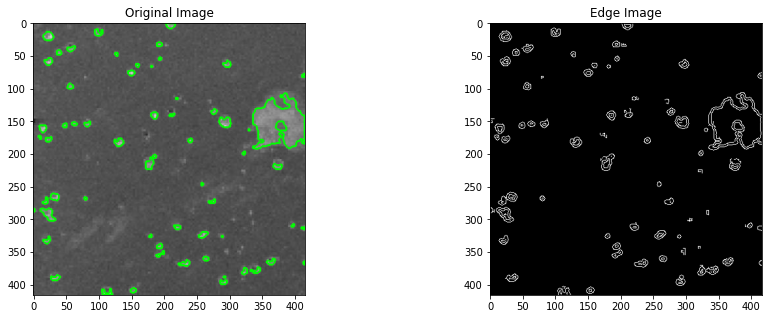

In [ ]:
edges = cv2.Canny(image,100,200)

fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(image,cmap = 'gray')
ax[0].set_title('Original Image') 
ax[0].axis('on')
ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title('Edge Image')
ax[1].axis('on')
print("Area do defeito encontrado (pixels):  ", area)
print("Numero de defeitos encontrados -> ", len(contours))

plt.show()

In [ ]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 1)
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(edges,cmap = 'gray')
ax[0].set_title('Original Edge') 
ax[0].axis('on')
ax[1].imshow(dilation,cmap = 'gray')
ax[1].set_title('Dilated')
plt.axis('on')
plt.show()

In [ ]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel)
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(dilation,cmap = 'gray')
ax[0].set_title('Original') 
plt.axis('off')
ax[1].imshow(erosion,cmap = 'gray')
ax[1].set_title('Eroded')
plt.axis('off')
plt.show()

In [ ]:
kernel = np.ones((10,10),np.uint8)
edges_3 = cv2.Canny(image_seg,125,255)
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(image_seg, cmap='gray')
ax[0].set_title('Original Image') 
ax[0].axis('off')
ax[1].imshow(image_morpho,cmap = 'gray')
ax[1].set_title('Opening Image')
ax[1].axis('off')
plt.show()